In [2]:
import cv2
from PIL import Image
import numpy as np

In [ ]:
cv2.imwrite(src)

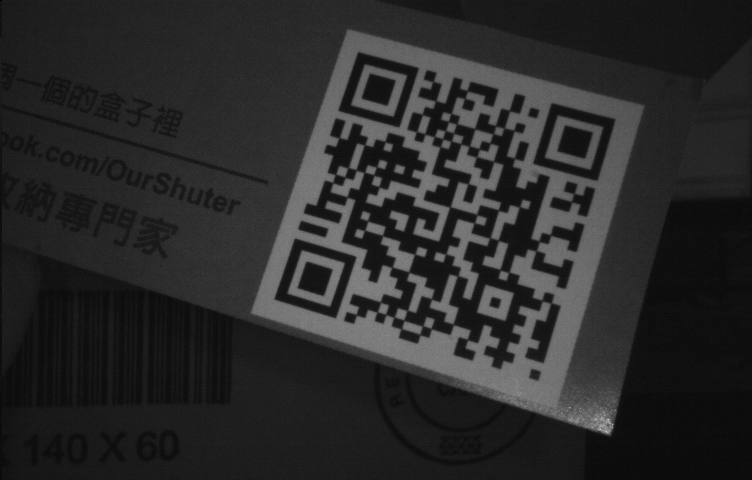

In [61]:
image_pth = "./data/paper_qr/File 020.bmp"
qr_image = cv2.imread(image_pth, 0)
Image.fromarray(qr_image)

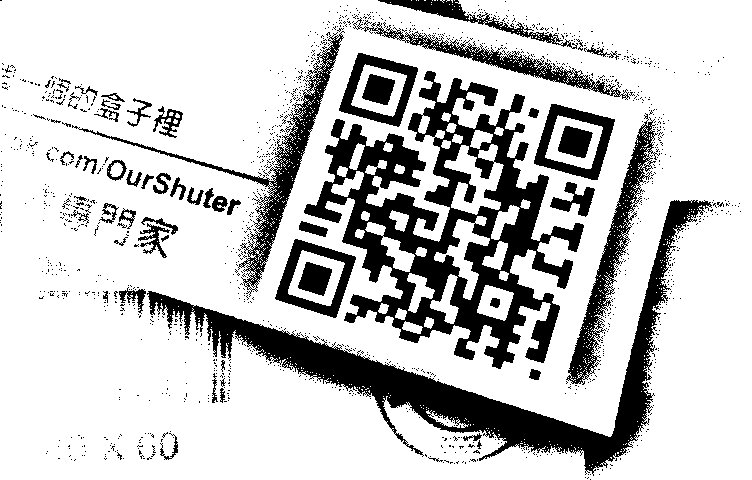

In [47]:
# 二值化
thres1 = cv2.adaptiveThreshold(qr_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 10)
# thres2 = cv2.adaptiveThreshold(qr_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C    , cv2.THRESH_BINARY, 199, 10)
# cv2.imshow('Adaptive Mean', thres1)
# cv2.imshow('Adaptive Gaussian', thres2)
# # De-allocate any associated memory usage  
# if cv2.waitKey(0) & 0xff == 27: 
#     cv2.destroyAllWindows() 
Image.fromarray(thres1)

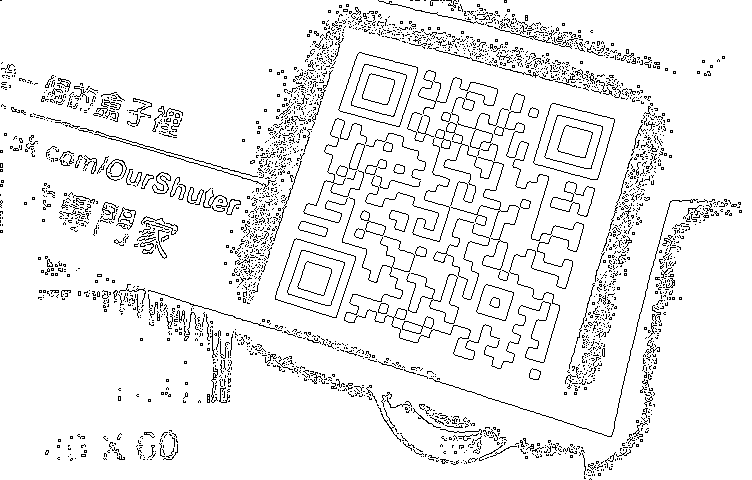

In [48]:
# edge detection
edges = cv2.Canny(thres1, 10, 254)
edges = 255-(edges)
Image.fromarray(edges)

In [ ]:
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 1)
# _qr_image = np.array(qr_image)

# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(_qr_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Image.fromarray(_qr_image)

In [49]:
#kernel = np.array([[1,1,1],[1,1,1],[1,1,1]], np.uint8)
kernel = np.ones((5,5), np.uint8)

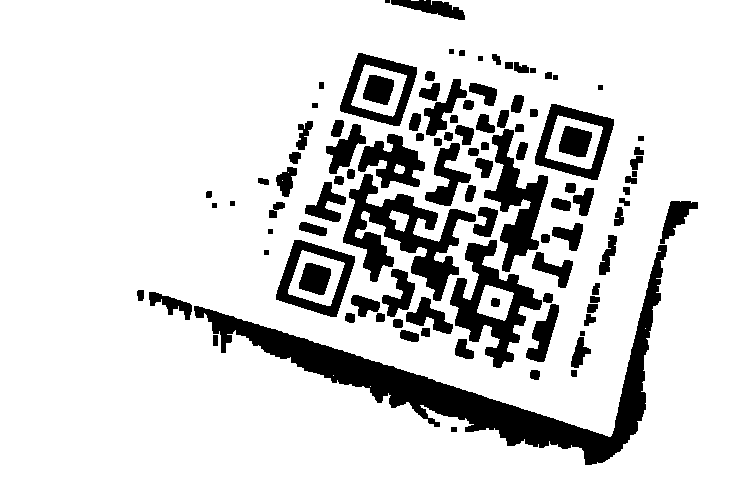

In [60]:
# closing
# 先侵蝕(侵蝕數值高的-白色) 再 膨脹。
# 閉運算 為 先膨脹 再 腐蝕
dilation = cv2.dilate(thres1, kernel, iterations = 1)
erosion = cv2.erode(dilation, kernel, iterations = 1)

Image.fromarray(erosion)

#filling = cv2.morphologyEx(erosion, cv2.)

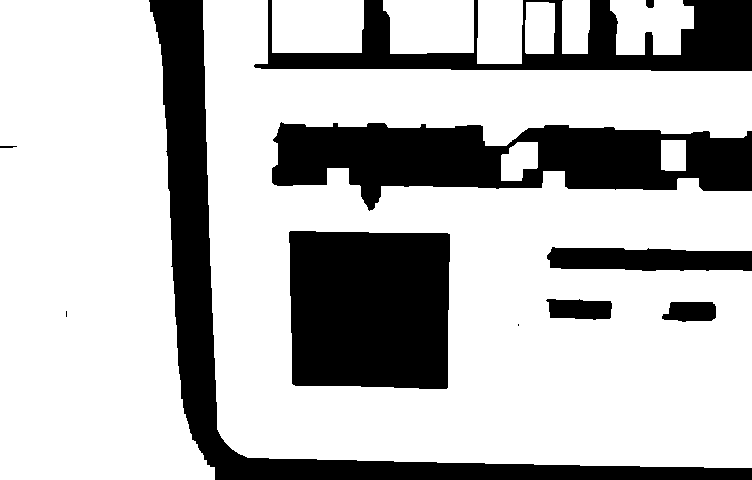

In [45]:
# 侵蝕 closeing & 會搭配 CNN candidates 來鎖定 QR code 的位置。
dilation = cv2.dilate(erosion, kernel, iterations = 5)
Image.fromarray(dilation)

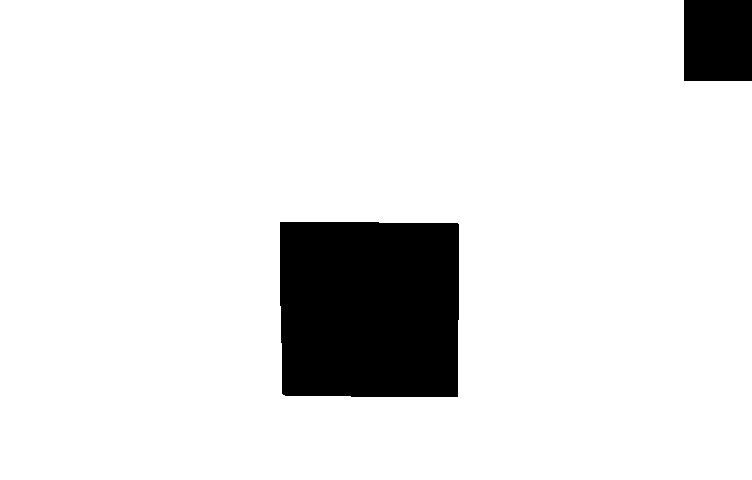

In [32]:
erosion = cv2.erode(dilation, kernel, iterations = 20)

Image.fromarray(erosion)

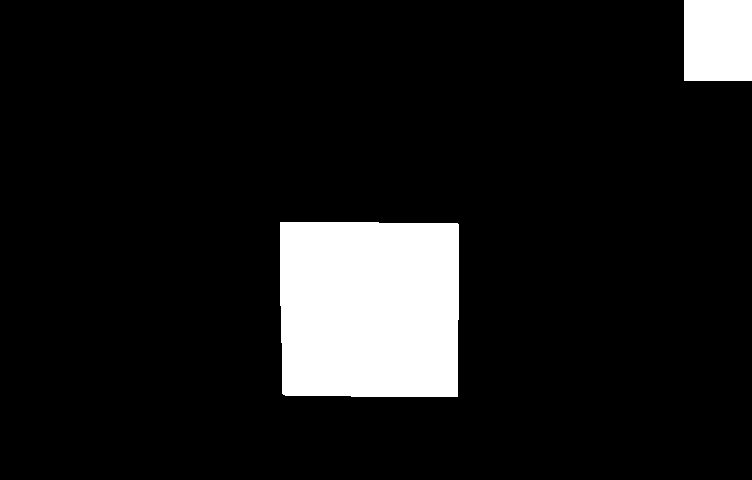

In [26]:
Image.fromarray(255-erosion)

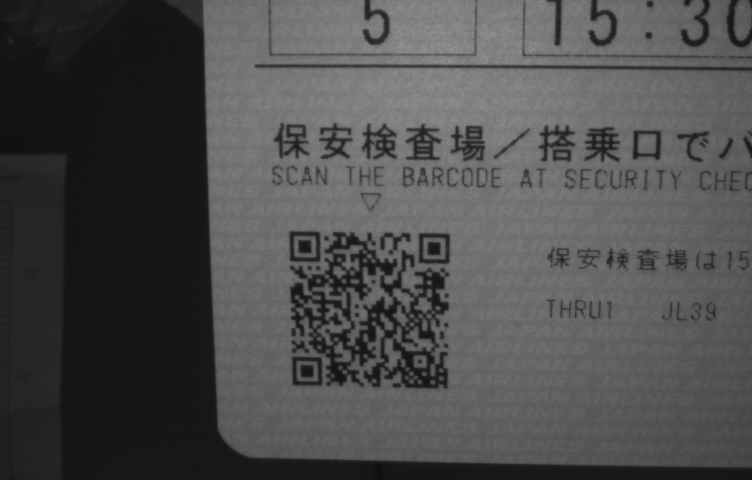

In [106]:
# 原圖
Image.fromarray(qr_image)
